**Завдання 1**
* Провести крос-валідацію для моделі, подудованої на основі датафрейму 'student_scores' з попереднього завдання.

In [218]:
import pandas as pd

# Read the data from the file.
df = pd.read_csv('student_scores.csv')
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### StratifiedKFold Validation:

In [221]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score


X = df['Hours']
X_array = np.array(X).reshape(-1, 1)

y = df['Scores']
y_array = np.array(y).reshape(-1, 1)

lin = LinearRegression()

skf_folds = StratifiedKFold(n_splits=2)

print('=====', skf_folds, '=====\n')

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(skf_folds.split(X, y)):
    print(f'Fold {i}:')
    print(f'Train index={train_index}')
    print(f'Test index={test_index}\n')

scores = cross_val_score(lin, X_array, y_array, cv=skf_folds)

print('\nCross Valid Scores:', scores)
print('Average Cross Valid Scores:', scores.mean())
print('Number of CV Valid Scores used in Average:', len(scores))


===== StratifiedKFold(n_splits=2, random_state=None, shuffle=False) =====

Fold 0:
Train index=[ 1  3  5  7  9 11 13 15 18 20 21 23]
Test index=[ 0  2  4  6  8 10 12 14 16 17 19 22 24]

Fold 1:
Train index=[ 0  2  4  6  8 10 12 14 16 17 19 22 24]
Test index=[ 1  3  5  7  9 11 13 15 18 20 21 23]


Cross Valid Scores: [0.94989443 0.92508542]
Average Cross Valid Scores: 0.9374899253341885
Number of CV Valid Scores used in Average: 2


E:\Python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
E:\Python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


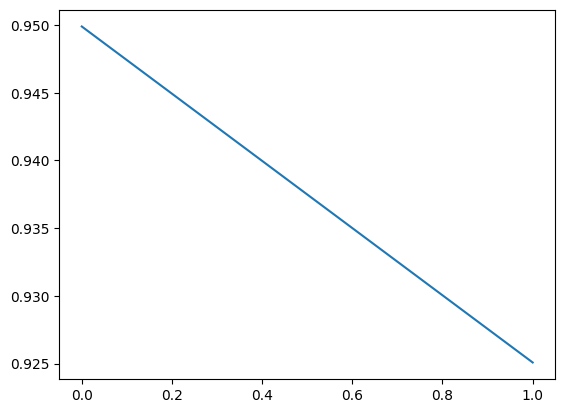

In [222]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores)


**Завдання 2**
* Провести крос-валідацію для моделі, подудованої на основі датафрейму 'petrol_consumption' з попереднього завдання.

In [201]:
import pandas as pd

# Read the data from the file.
df = pd.read_csv('petrol_consumption.csv')
df


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


### KFold Validation:

In [215]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score


X = df[
    ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
]

y = df['Petrol_Consumption']

X, y = np.array(X), np.array(y)

regr = LinearRegression()
regr.fit(X, y)

kf = KFold(n_splits=4)
kf.get_n_splits(X)

print('=====', kf, '=====\n')

KFold(n_splits=5, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"Train index = {train_index}")
    print(f"Test index = {test_index}\n")

scores = cross_val_score(regr, X, y, cv=kf)

print('Cross Valid Scores:', scores)
print('Average Cross Valid Scores:', scores.mean())
print('Number of CV Valid Scores used in Average:', len(scores))


===== KFold(n_splits=4, random_state=None, shuffle=False) =====

Fold 0:
Train index = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47]
Test index = [ 0  1  2  3  4  5  6  7  8  9 10 11]

Fold 1:
Train index = [ 0  1  2  3  4  5  6  7  8  9 10 11 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47]
Test index = [12 13 14 15 16 17 18 19 20 21 22 23]

Fold 2:
Train index = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 36 37 38 39 40 41 42 43 44 45 46 47]
Test index = [24 25 26 27 28 29 30 31 32 33 34 35]

Fold 3:
Train index = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Test index = [36 37 38 39 40 41 42 43 44 45 46 47]

Cross Valid Scores: [-0.07967799  0.60012704  0.2400388   0.21927164]
Average Cross Valid Scores: 0.24493987411481494
Number of CV Valid Scores used in Average: 4


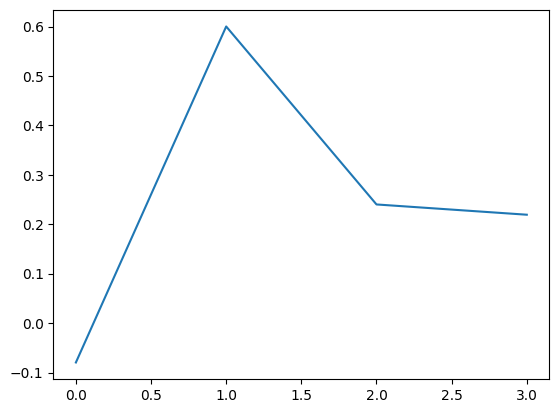

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(scores)
